# Video Game Sales Analysis

### Github地址：https://github.com/AdamFocus/VideoGameSalesAnalysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [57]:
import warnings
warnings.filterwarnings('ignore')

### 读取video game sales数据集

In [4]:
data=pd.read_csv('vgsales.csv')

In [5]:
data.shape

(16598, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### 剔除缺失值

In [7]:
data.dropna(how="any",inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 1.电子游戏市场分析
对比分析电子游戏市场

### 1.1 NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales的五数概括

In [9]:
data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


### 1.2 绘制盒图
绘制NA_Sales、EU_Sales、JP_Sales、Other_Sales、Global_Sales五个数值属性的盒图

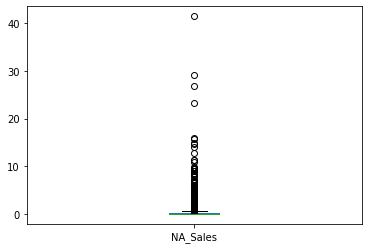

In [10]:
data.NA_Sales.plot.box()

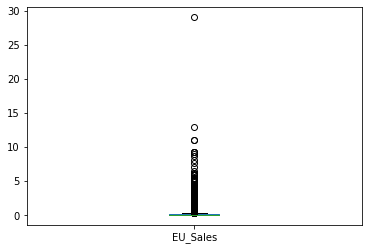

In [11]:
data.EU_Sales.plot.box()

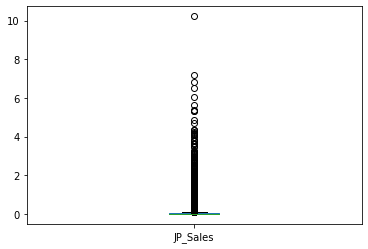

In [12]:
data.JP_Sales.plot.box()

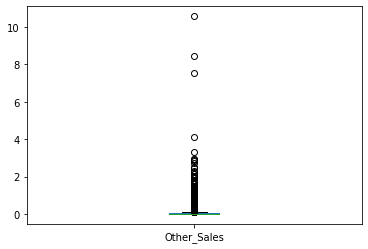

In [13]:
data.Other_Sales.plot.box()

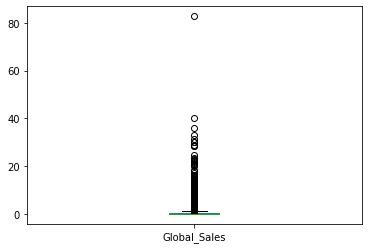

In [14]:
data.Global_Sales.plot.box()

### 1.3 绘制游戏平台的直方图，查看最受欢迎的游戏平台

In [15]:
platform=data.Platform.value_counts()
platform.head(20)

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
Name: Platform, dtype: int64

In [16]:
print('一共有',len(platform),'个游戏平台')

一共有 31 个游戏平台


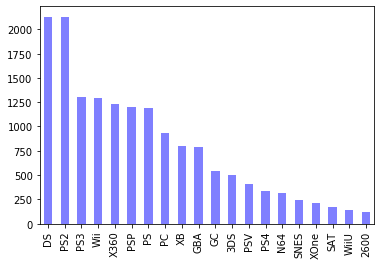

In [17]:
platform.head(20).plot(kind='bar',color='blue',alpha=0.5)

#### 分析
- 全时期DS与PS2为最流行的游戏平台
- PS3、WII、X360、PSP和PS销量基本上相近

#### 将year转变成int形式，便于进一步分析

In [18]:
data.Year = data.Year.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null int32
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


### 1.4 绘制发行公司的直方图，查看最受欢迎的发行公司

In [19]:
publisher=data.Publisher.value_counts()
publisher.head()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: Publisher, dtype: int64

In [20]:
print('一共有',len(publisher),'个发行公司')

一共有 576 个发行公司


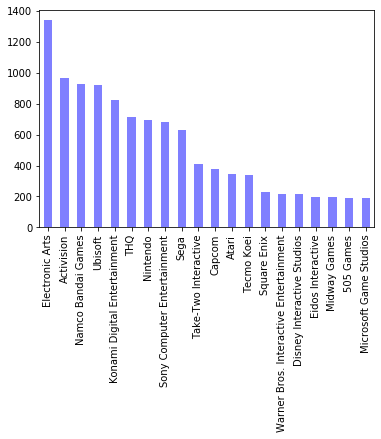

In [21]:
publisher.head(20).plot(kind='bar',color='blue',alpha=0.5)

#### 分析
- EA天下第一
- 动视、育碧、万代三足鼎立

### 1.5 绘制游戏类型的直方图，查看最受欢迎的游戏类型

In [22]:
genre=data.Genre.value_counts()
genre

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [23]:
print('一共有',len(genre),'个游戏类型')

一共有 12 个游戏类型


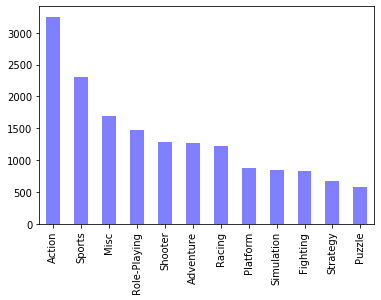

In [24]:
genre.plot(kind='bar',color='blue',alpha=0.5)

#### 分析
- 总的来说动作类游戏最受欢迎
- 运动类游戏由于年龄段全覆盖也比较受欢迎

## 2.预测每年的游戏销售额

### 2.1将Name/Rank字段去除

In [25]:
Pdata=data.copy()
Pdata.drop(['Name','Rank'],axis=1,inplace=True)

In [26]:
Pdata.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
Pdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 9 columns):
Platform        16291 non-null object
Year            16291 non-null int32
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5), int32(1), object(3)
memory usage: 1.2+ MB


### 2.2将Platform、Genre、Publisher转变成数值离散形式
借助**LabelEncoder**

In [28]:
number = LabelEncoder()
Pdata['Platform'] = number.fit_transform(Pdata['Platform'].astype('str'))
Pdata['Genre'] = number.fit_transform(Pdata['Genre'].astype('str'))
Pdata['Publisher'] = number.fit_transform(Pdata['Publisher'].astype('str'))

#另一种方法
#pb = Pdata.Publisher.unique()
#pb_dict  = dict(zip(pb, range(len(pb))))
#Pdata.Publisher=Pdata.Publisher.map(pb_dict)
#Pdata
###

Pdata.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,26,2006,10,359,41.49,29.02,3.77,8.46,82.74
1,11,1985,4,359,29.08,3.58,6.81,0.77,40.24
2,26,2008,6,359,15.85,12.88,3.79,3.31,35.82
3,26,2009,10,359,15.75,11.01,3.28,2.96,33.00
4,5,1996,7,359,11.27,8.89,10.22,1.00,31.37


### 2.3查看各特征的相关性

In [29]:
corrData=Pdata.corr()
corrData

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,1.000000,0.167648,0.026665,-0.017938,0.041976,0.046748,-0.079621,0.054493,0.027929
Year,0.167648,1.000000,-0.125366,0.029802,-0.091285,0.006108,-0.169387,0.041128,-0.074647
Genre,0.026665,-0.125366,1.000000,-0.051176,0.018057,0.017005,0.030304,0.009802,0.022215
Publisher,-0.017938,0.029802,-0.051176,1.000000,0.005370,0.013237,0.053019,0.014569,0.019368
NA_Sales,0.041976,-0.091285,0.018057,0.005370,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.046748,0.006108,0.017005,0.013237,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.079621,-0.169387,0.030304,0.053019,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.054493,0.041128,0.009802,0.014569,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,0.027929,-0.074647,0.022215,0.019368,0.941269,0.903264,0.612774,0.747964,1.000000


(9.0, 0.0)

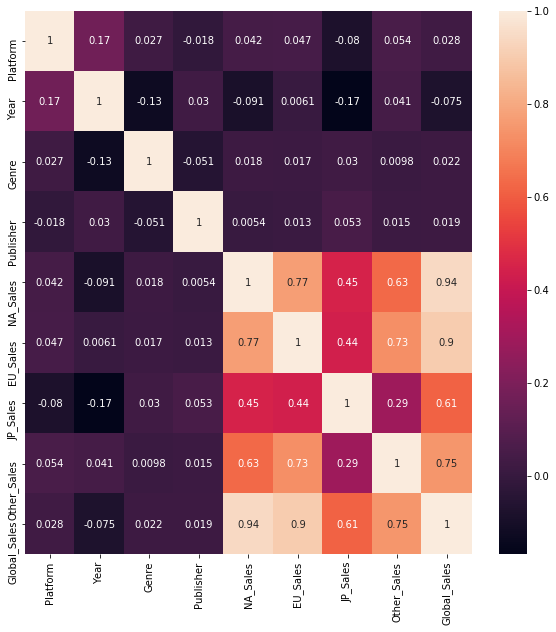

In [30]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(Pdata.corr(),cbar=True,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### NA和EU占据总销量的大部分，Platform,Genre,Publisher,Year相关性较差

### 2.4选取特征、划分数据
#### 对于每年总销量的预测，选取Platform,Genre,Publisher,Year作为特征

In [47]:
salefeatures = ['Platform','Genre','Publisher','Year','NA_Sales','EU_Sales']
otherfeatures=['JP_Sales','Other_Sales']

#### 进行训练集测试集划分

In [48]:
X = Pdata[salefeatures]
y = Pdata.Global_Sales 
train_X , test_X , train_y , test_y = train_test_split(X,y,test_size=0.25,random_state=1)

#### 进行数据归一化

In [49]:
scaler = StandardScaler()
#scaler = preprocessing.MinMaxScaler()

# Fit only on training data
scaler.fit(train_X)
train_X = scaler.transform(train_X)
# apply same transformation to test data
test_X = scaler.transform(test_X)

### 2.5使用决策树回归预测

In [50]:
DTreemodel = DecisionTreeRegressor(random_state=1)
DTreemodel.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [51]:
predictions =DTreemodel.predict(test_X)
mae = mean_absolute_error(predictions, test_y)
print('Mean absolute error '+str(mae))

Mean absolute error 0.10480583836328988


### 2.6使用KNN进行预测

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
regKNR = KNeighborsRegressor()

regKNR.fit(train_X,train_y)
predictions =regKNR.predict(test_X)
mae = mean_absolute_error(predictions, test_y)
print('Mean absolute error '+str(mae))

Mean absolute error 0.125858089860054


### 2.7使用LinearSVR进行预测

In [54]:
from sklearn.svm import LinearSVR

In [58]:
clf = LinearSVR(verbose = 10)
clf.fit(train_X,train_y)
predictions =clf.predict(test_X)
mae = mean_absolute_error(predictions, test_y)
print('Mean absolute error '+str(mae))

[LibLinear]Mean absolute error 0.08820566494265246


### 三种方法对比，LinearSVR效果更好
### 2.8绘制预测与实际结果的对比图

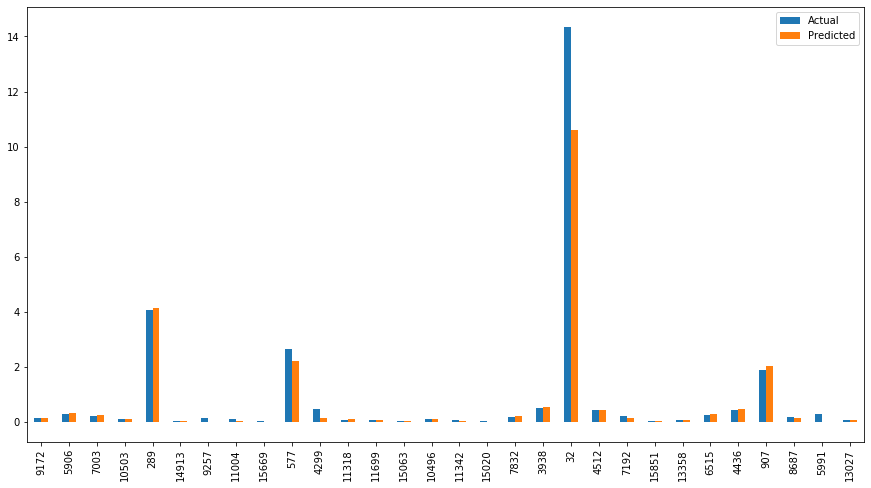

In [59]:
df = pd.DataFrame({'Actual': test_y, 'Predicted': predictions}).head(30)
df.plot(kind='bar',figsize=(15,8))
plt.show()

## 3.可视化应用
### 3.1 查看2005到2016年的不同的游戏类型的销量变化图

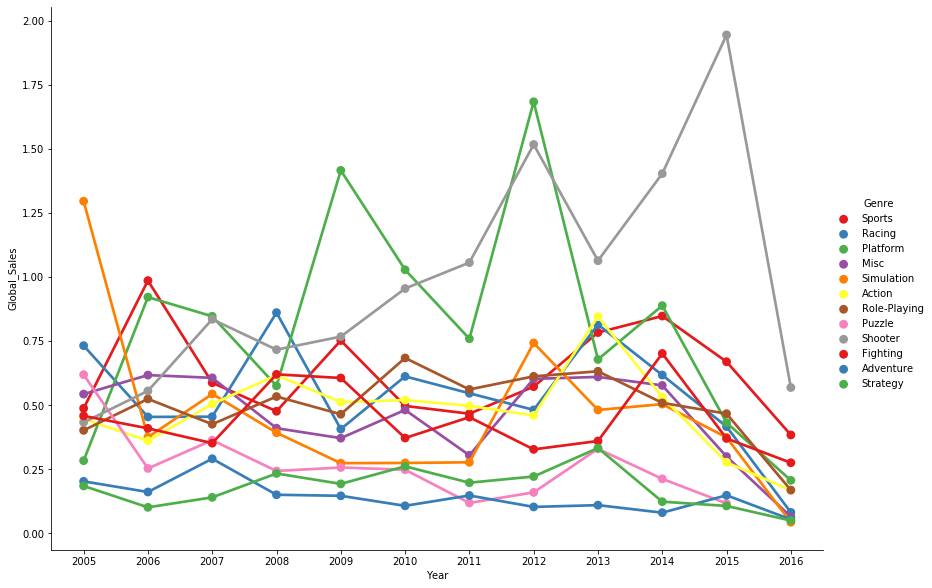

In [43]:
newdata=data[(data.Year>2004)&(data.Year<2017)]

sns.catplot(x="Year",y="Global_Sales",kind="point",
            data=newdata,
            hue = "Genre",
            palette='Set1',
            ci = None,
            edgecolor=None,
            height=8.27, 
            aspect=11.7/8.27)
plt.show()

### 3.2查看2005到2016年各平台的游戏数量变化

#### 筛选数据并绘制图像

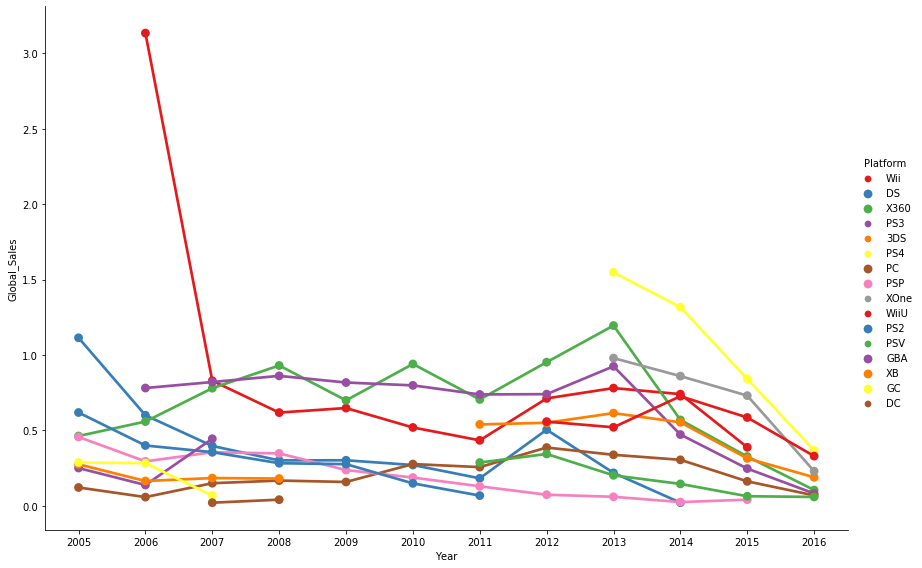

In [44]:
newdata=data[(data.Year>2004)&(data.Year<2017)]

sns.catplot(x="Year",y="Global_Sales",kind="point",
            data=newdata,
            hue = "Platform",
            palette='Set1',
            ci = None,
            edgecolor=None,
            height=8, 
            aspect=12/8)
plt.show()

#### 分析
- ps4从诞生以来就很受欢迎
- 游戏市场逐渐萎缩

### 3.3查看2005到2016年发行公司的销量变化

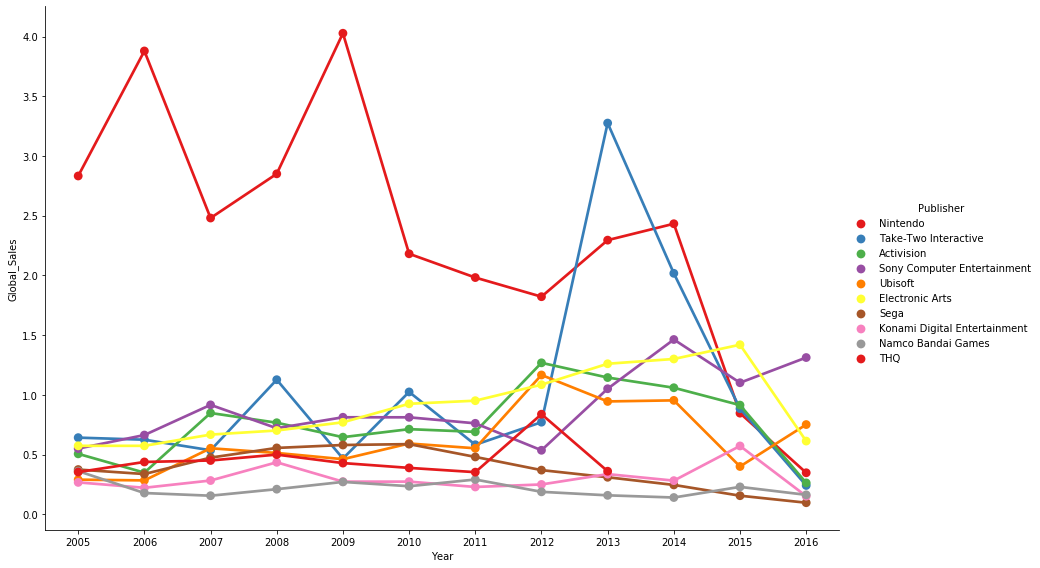

In [45]:
newdata=data[(data.Year>2004)&(data.Year<2017)&(data.Publisher.isin(publisher.index.values[:10]))]

sns.catplot(x="Year",y="Global_Sales",kind="point",
            data=newdata,
            hue = "Publisher",
            palette='Set1',
            ci = None,
            edgecolor=None,
            height=8, 
            aspect=12/8)
plt.show()

#### 游戏行业越发不景气

### 3.4查看从1980到2020的总游戏销量

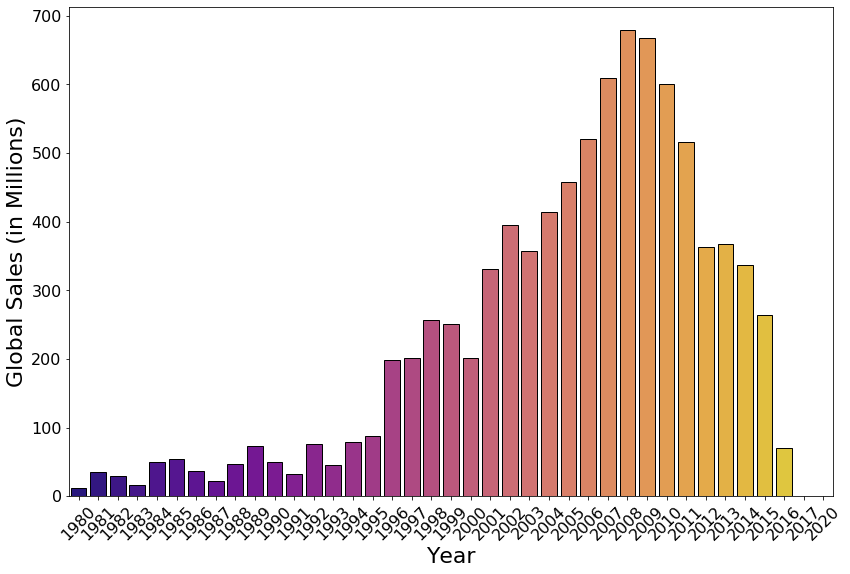

In [46]:
g_sales_over_years = data.groupby(['Year'])['Global_Sales'].sum()

box_plot_df = pd.DataFrame(columns=[str(int(i)) for i in g_sales_over_years.index])

for i in g_sales_over_years.index:
        box_plot_df.at[0, str(int(i))] = g_sales_over_years[i]

plt.figure(figsize=(13.7, 9))

sns.barplot(x='variable', y='value', data=pd.melt(box_plot_df), palette='plasma', ec='Black')

plt.ylabel('Global Sales (in Millions)', fontsize=22)
plt.xlabel('Year', fontsize=22)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 3.5查看action类型中名字构成的词云

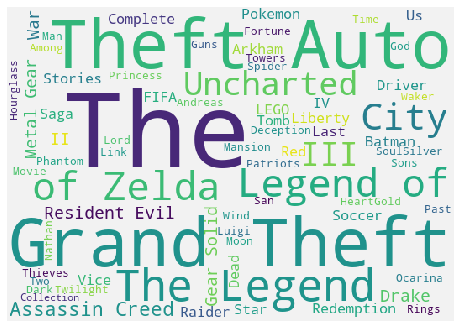

In [61]:
from wordcloud import WordCloud  # word cloud library
w_data = data[data.Genre == 'Action'].iloc[:50,:]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                        background_color='#f2f2f2',
                        width=532,
                        height=374
                     ).generate(" ".join(w_data.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()